# Code to create data from the text locations.  OpenCV EAST 
# Base code was used from (https://github.com/opencv/opencv/blob/master/samples/dnn/text_detection.py) and then heavily modified to fit our use case.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
#import cv2
import pandas as pd
import pickle
import random
import time
import psutil
import dill
from scipy.spatial import distance

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
import glob
all_list = pickle.load( open( "/home/ubuntu/efs/acrin_by_machine/machine_photos/list_save.pkl", "rb" ) )
df = pickle.load( open( "/home/ubuntu/efs/acrin_by_machine/machine_photos/df_save.pkl", "rb" ) )
df['machine']=0
for index,row in df.iterrows():
    df.loc[index,'machine'] = row.fileName.split('/')[-2][-1]
mach1_list = list(df[(df.machine=='1') & (df.good==1)].fileName)
mach2_list = list(df[(df.machine=='2') & (df.good==1)].fileName)
mach3_list = list(df[(df.machine=='3') & (df.good==1)].fileName)
mach4_list = list(df[(df.machine=='4') & (df.good==1)].fileName)
mach5_list = list(df[(df.machine=='5') & (df.good==1)].fileName)
mach6_list = list(df[(df.machine=='6') & (df.good==1)].fileName)

In [4]:
# Import required modules
import cv2 as cv
import math
import argparse


confThreshold = 0.00000001
nmsThreshold = 0.5
inpWidth = 320
inpHeight = 320
model = 'frozen_east_text_detection.pb'



# these six functions were used to determine if the centroid of each text detection was with the bounding boxes that we determined were PII

In [5]:
def is_in_rect_mach1(bc,ec,br,er,centr,centc,old_size,ratio,sc,rc,new_im):

    new_size = tuple([int(x*ratio) for x in old_size])

    top = int((old_size[0] - new_size[0])/2)
    bottom = int((old_size[0] - new_size[0])/2)
    left = int((old_size[1] - new_size[1])/2)
    right = int((old_size[1] - new_size[1])/2)

    box1_ulc = left+int(650*ratio)+sc
    box1_ulr = top+int(550*ratio)+sr

    box1_lrc = right + int(1450*ratio)+sc
    box1_lrr = bottom + int(650*ratio)+sr
    
    
    box2_ulc = left+int(650*ratio)+sc
    box2_ulr = top+int(650*ratio)+sr

    box2_lrc = right + int(1450*ratio)+sc
    box2_lrr = bottom + int(750*ratio)+sr


    box3_ulc = left+int(2750*ratio)+sc
    box3_ulr = top+int(620*ratio)+sr

    box3_lrc = right + int(3400*ratio)+sc
    box3_lrr = bottom + int(705*ratio)+sr


    
    if (box1_ulc < centc < box1_lrc) & (box1_ulr < centr < box1_lrr):
        return(True)
    if (box2_ulc < centc < box2_lrc) & (box2_ulr < centr < box2_lrr):
        return(True)
    if (box3_ulc < centc < box3_lrc) & (box3_ulr < centr < box3_lrr):
        return(True)


In [6]:
def is_in_rect_mach2(bc,ec,br,er,centr,centc,old_size,ratio,sc,rc,new_im):

    new_size = tuple([int(x*ratio) for x in old_size])

    top = int((old_size[0] - new_size[0])/2)
    bottom = int((old_size[0] - new_size[0])/2)
    left = int((old_size[1] - new_size[1])/2)
    right = int((old_size[1] - new_size[1])/2)


    box1_ulc = left+int(530*ratio)+sc
    box1_ulr = top+int(550*ratio)+sr

    box1_lrc = right + int(1485*ratio)+sc
    box1_lrr = bottom + int(655*ratio)+sr
    
    
    box2_ulc = left+int(530*ratio)+sc
    box2_ulr = top+int(650*ratio)+sr

    box2_lrc = right + int(1485*ratio)+sc
    box2_lrr = bottom + int(730*ratio)+sr


    box3_ulc = left+int(1495*ratio)+sc
    box3_ulr = top+int(550*ratio)+sr

    box3_lrc = right + int(2620*ratio)+sc
    box3_lrr = bottom + int(655*ratio)+sr

    
    box4_ulc = left+int(1495*ratio)+sc
    box4_ulr = top+int(650*ratio)+sr


    box4_lrc = right + int(2620*ratio)+sc
    box4_lrr = bottom + int(730*ratio)+sr



    
    if (box1_ulc < centc < box1_lrc) & (box1_ulr < centr < box1_lrr):
        return(True)
    if (box2_ulc < centc < box2_lrc) & (box2_ulr < centr < box2_lrr):
        return(True)
    if (box3_ulc < centc < box3_lrc) & (box3_ulr < centr < box3_lrr):
        return(True)
    if (box4_ulc < centc < box4_lrc) & (box4_ulr < centr < box4_lrr):
        return(True)

    

In [7]:
def is_in_rect_mach3(bc,ec,br,er,centr,centc,old_size,ratio,sc,rc,new_im):

    new_size = tuple([int(x*ratio) for x in old_size])

    top = int((old_size[0] - new_size[0])/2)
    bottom = int((old_size[0] - new_size[0])/2)
    left = int((old_size[1] - new_size[1])/2)
    right = int((old_size[1] - new_size[1])/2)

    box1_ulc = left+int(351*ratio)+sc
    box1_ulr = top+int(470*ratio)+sr

    box1_lrc = right + int(1450*ratio)+sc
    box1_lrr = bottom + int(549*ratio)+sr
    
    
    box2_ulc = left+int(1455*ratio)+sc
    box2_ulr = top+int(465*ratio)+sr

    box2_lrc = right + int(2440*ratio)+sc
    box2_lrr = bottom + int(544*ratio)+sr


    box3_ulc = left+int(351*ratio)+sc
    box3_ulr = top+int(560*ratio)+sr

    box3_lrc = right + int(1450*ratio)+sc
    box3_lrr = bottom + int(638*ratio)+sr

    
    box4_ulc = left+int(2445*ratio)+sc
    box4_ulr = top+int(460*ratio)+sr


    box4_lrc = right + int(2900*ratio)+sc
    box4_lrr = bottom + int(539*ratio)+sr


    box5_ulc = left+int(2445*ratio)+sc
    box5_ulr = top+int(550*ratio)+sr

    box5_lrc = right + int(2900*ratio)+sc
    box5_lrr = bottom + int(628*ratio)+sr


    
    if (box1_ulc < centc < box1_lrc) & (box1_ulr < centr < box1_lrr):
        return(True)
    if (box2_ulc < centc < box2_lrc) & (box2_ulr < centr < box2_lrr):
        return(True)
    if (box3_ulc < centc < box3_lrc) & (box3_ulr < centr < box3_lrr):
        return(True)
    if (box4_ulc < centc < box4_lrc) & (box4_ulr < centr < box4_lrr):
        return(True)
    if (box5_ulc < centc < box5_lrc) & (box5_ulr < centr < box5_lrr):
        return(True)
    

In [8]:
def is_in_rect_mach4(bc,ec,br,er,centr,centc,old_size,ratio,sc,rc,new_im):

    new_size = tuple([int(x*ratio) for x in old_size])

    top = int((old_size[0] - new_size[0])/2)
    bottom = int((old_size[0] - new_size[0])/2)
    left = int((old_size[1] - new_size[1])/2)
    right = int((old_size[1] - new_size[1])/2)


    box1_ulc = left+int(950*ratio)+sc
    box1_ulr = top+int(450*ratio)+sr

    box1_lrc = right + int(2050*ratio)+sc
    box1_lrr = bottom + int(549*ratio)+sr
    

    box2_ulc = left+int(530*ratio)+sc
    box2_ulr = top+int(549*ratio)+sr

    box2_lrc = right + int(1550*ratio)+sc
    box2_lrr = bottom + int(648*ratio)+sr


    box3_ulc = left+int(2050*ratio)+sc
    box3_ulr = top+int(450*ratio)+sr

    box3_lrc = right + int(2890*ratio)+sc
    box3_lrr = bottom + int(544*ratio)+sr

    
    box4_ulc = left+int(1550*ratio)+sc
    box4_ulr = top+int(550*ratio)+sr


    box4_lrc = right + int(2480*ratio)+sc
    box4_lrr = bottom + int(648*ratio)+sr



    
    if (box1_ulc < centc < box1_lrc) & (box1_ulr < centr < box1_lrr):
        return(True)
    if (box2_ulc < centc < box2_lrc) & (box2_ulr < centr < box2_lrr):
        return(True)
    if (box3_ulc < centc < box3_lrc) & (box3_ulr < centr < box3_lrr):
        return(True)
    if (box4_ulc < centc < box4_lrc) & (box4_ulr < centr < box4_lrr):
        return(True)

    

In [9]:
def is_in_rect_mach5(bc,ec,br,er,centr,centc,old_size,ratio,sc,rc,new_im):

    new_size = tuple([int(x*ratio) for x in old_size])

    top = int((old_size[0] - new_size[0])/2)
    bottom = int((old_size[0] - new_size[0])/2)
    left = int((old_size[1] - new_size[1])/2)
    right = int((old_size[1] - new_size[1])/2)
    
    
    box1_ulc = left+int(500*ratio)+sc
    box1_ulr = top+int(650*ratio)+sr

    box1_lrc = right + int(1400*ratio)+sc
    box1_lrr = bottom + int(750*ratio)+sr
    
    
    box2_ulc = left+int(500*ratio)+sc
    box2_ulr = top+int(750*ratio)+sr

    box2_lrc = right + int(1400*ratio)+sc
    box2_lrr = bottom + int(850*ratio)+sr


    box3_ulc = left+int(1400*ratio)+sc
    box3_ulr = top+int(650*ratio)+sr

    box3_lrc = right + int(2300*ratio)+sc
    box3_lrr = bottom + int(750*ratio)+sr

    
    box4_ulc = left+int(2600*ratio)+sc
    box4_ulr = top+int(650*ratio)+sr


    box4_lrc = right + int(3300*ratio)+sc
    box4_lrr = bottom + int(750*ratio)+sr


    box5_ulc = left+int(2600*ratio)+sc
    box5_ulr = top+int(750*ratio)+sr

    box5_lrc = right + int(3300*ratio)+sc
    box5_lrr = bottom + int(850*ratio)+sr


    
    if (box1_ulc < centc < box1_lrc) & (box1_ulr < centr < box1_lrr):
        return(True)
    if (box2_ulc < centc < box2_lrc) & (box2_ulr < centr < box2_lrr):
        return(True)
    if (box3_ulc < centc < box3_lrc) & (box3_ulr < centr < box3_lrr):
        return(True)
    if (box4_ulc < centc < box4_lrc) & (box4_ulr < centr < box4_lrr):
        return(True)
    if (box5_ulc < centc < box5_lrc) & (box5_ulr < centr < box5_lrr):
        return(True)
    

In [10]:
def is_in_rect_mach6(bc,ec,br,er,centr,centc,old_size,ratio,sc,rc,new_im):

    new_size = tuple([int(x*ratio) for x in old_size])

    top = int((old_size[0] - new_size[0])/2)
    bottom = int((old_size[0] - new_size[0])/2)
    left = int((old_size[1] - new_size[1])/2)
    right = int((old_size[1] - new_size[1])/2)
    
    box1_ulc = left+int(300*ratio)+sc
    box1_ulr = top+int(450*ratio)+sr

    box1_lrc = right + int(1100*ratio)+sc
    box1_lrr = bottom + int(520*ratio)+sr
    
    
    box2_ulc = left+int(300*ratio)+sc
    box2_ulr = top+int(520*ratio)+sr

    box2_lrc = right + int(1100*ratio)+sc
    box2_lrr = bottom + int(590*ratio)+sr


    box3_ulc = left+int(300*ratio)+sc
    box3_ulr = top+int(590*ratio)+sr

    box3_lrc = right + int(1100*ratio)+sc
    box3_lrr = bottom + int(660*ratio)+sr

    
    box4_ulc = left+int(300*ratio)+sc
    box4_ulr = top+int(660*ratio)+sr


    box4_lrc = right + int(1100*ratio)+sc
    box4_lrr = bottom + int(730*ratio)+sr

    box5_ulc = left+int(2280*ratio)+sc
    box5_ulr = top+int(430*ratio)+sr


    box5_lrc = right + int(3400*ratio)+sc
    box5_lrr = bottom + int(505*ratio)+sr
    
    if (box1_ulc < centc < box1_lrc) & (box1_ulr < centr < box1_lrr):
        return(True)
    if (box2_ulc < centc < box2_lrc) & (box2_ulr < centr < box2_lrr):
        return(True)
    if (box3_ulc < centc < box3_lrc) & (box3_ulr < centr < box3_lrr):
        return(True)
    if (box4_ulc < centc < box4_lrc) & (box4_ulr < centr < box4_lrr):
        return(True)
    if (box5_ulc < centc < box5_lrc) & (box5_ulr < centr < box5_lrr):
        return(True)

In [11]:
# code to decode the text extraction from OPENCV EAST, this code is unmodified from GitHUB
def decode(scores, geometry, scoreThresh,img_name):
    detections = []
    confidences = []
    
    
    ############ CHECK DIMENSIONS AND SHAPES OF geometry AND scores ############
    assert len(scores.shape) == 4, "Incorrect dimensions of scores"
    assert len(geometry.shape) == 4, "Incorrect dimensions of geometry"
    assert scores.shape[0] == 1, "Invalid dimensions of scores"
    assert geometry.shape[0] == 1, "Invalid dimensions of geometry"
    assert scores.shape[1] == 1, "Invalid dimensions of scores"
    assert geometry.shape[1] == 5, "Invalid dimensions of geometry"
    assert scores.shape[2] == geometry.shape[2], "Invalid dimensions of scores and geometry"
    assert scores.shape[3] == geometry.shape[3], "Invalid dimensions of scores and geometry"
    height = scores.shape[2]
    width = scores.shape[3]
    for y in range(0, height):

        # Extract data from scores
        scoresData = scores[0][0][y]
        x0_data = geometry[0][0][y]
        x1_data = geometry[0][1][y]
        x2_data = geometry[0][2][y]
        x3_data = geometry[0][3][y]
        anglesData = geometry[0][4][y]
        for x in range(0, width):
            score = scoresData[x]

            # If score is lower than threshold score, move to next x
            if(score < scoreThresh):
                continue

            # Calculate offset
            offsetX = x * 4.0
            offsetY = y * 4.0
            angle = anglesData[x]

            # Calculate cos and sin of angle
            cosA = math.cos(angle)
            sinA = math.sin(angle)
            h = x0_data[x] + x2_data[x]
            w = x1_data[x] + x3_data[x]

            # Calculate offset
            offset = ([offsetX + cosA * x1_data[x] + sinA * x2_data[x], offsetY - sinA * x1_data[x] + cosA * x2_data[x]])

            # Find points for rectangle
            p1 = (-sinA * h + offset[0], -cosA * h + offset[1])
            p3 = (-cosA * w + offset[0],  sinA * w + offset[1])
            center = (0.5*(p1[0]+p3[0]), 0.5*(p1[1]+p3[1]))
            #center = (0.5*(p1[0]+p3[0])+w_off, 0.5*(p1[1]+p3[1])+h_off)
            #detections.append((center, (w,h), -1*angle * 180.0 / math.pi))
            detections.append((center, (w,h),0.0))
            
            confidences.append(float(score))

    # Return detections and confidences
    return [detections, confidences]

In [12]:
#code to use OPENCV east to create 5000 data points, this code was significantly modified but the base was from the GitHUB
confThreshold = 0.00005
nmsThreshold = 0.25
inpWidth = 320
inpHeight = 320
model = 'frozen_east_text_detection.pb'
import cv2
slices = 3

net = cv.dnn.readNet(model)

count = 0
scale_ratio=.85
scale_sr=.1
scale_sc=.1


#train_df = hkl.load('train_df.hkl')
with open('/home/ubuntu/train_df.pkl','rb') as fp:
    train_df=dill.load(fp)
#train_df = pd.DataFrame(columns=['fileName','ratio','sr','sc','machine', 'piidata','nopiidata'])

for i in range(5000):
    stime=time.time()
    this_frame = df.sample(n=1)
    pii_data = []
    nopii_data = []
    if int(this_frame.good)==1:
        my_image=this_frame.fileName.values[0]
        stime=time.time()
        img = cv.imread(my_image)
        ratio=rand_scale = random.uniform(scale_ratio,1)
        rand_scale = random.uniform(-scale_sr,scale_sr)
        sr=int(img.shape[0]*rand_scale)
        rand_scale = random.uniform(-scale_sc,scale_sc)
        sc=int(img.shape[1]*rand_scale)


        old_size = img.shape[:2] # old_size is in (height, width) format

        new_size = tuple([int(x*ratio) for x in old_size])

        # new_size should be in (width, height) format

        im = cv.resize(img, (new_size[1], new_size[0]))

        top = int((old_size[0] - new_size[0])/2)
        bottom = int((old_size[0] - new_size[0])/2)
        left = int((old_size[1] - new_size[1])/2)
        right = int((old_size[1] - new_size[1])/2)

        if top+bottom+new_size[0] < old_size[0]:
            top += 1
        if left+right+new_size[1] < old_size[1]:
            left += 1

        color = [0, 0, 0]
        img= cv.copyMakeBorder(im, top, bottom, left, right, cv.BORDER_CONSTANT,
            value=color)


        rows,cols,_ = img.shape
        M = np.float32([[1,0,sc],[0,1,sr]])
        img = cv.warpAffine(img,M,(cols,rows))

        split_1 = int(img.shape[0]/slices)
        split_2 = int(img.shape[1]/slices)
        for r in range(0,img.shape[0],split_1):
            for c in range(0,img.shape[1],split_2):
                cv2.imwrite('/home/ubuntu/opencveast/img_'+str(r)+'_'+str(c)+'_.png',img[r:r+split_1, c:c+split_2,:])

                nr = r + int((img.shape[0]/slices)/2)
                nc = c + int((img.shape[1]/slices)/2)
                cv2.imwrite('/home/ubuntu/opencveast/img_'+str(r)+'_'+str(nc)+'_.png',img[r:r+split_1, nc:nc+split_2,:])
                cv2.imwrite('/home/ubuntu/opencveast/img_'+str(nr)+'_'+str(c)+'_.png',img[nr:nr+split_1, c:c+split_2,:])
        img_list = glob.glob('/home/ubuntu/opencveast/img*')
        cnt = 1
        #net = cv.dnn.readNet(model)
        for this_image in img_list:    
            #print(cnt,end = ' ')
            #cnt = cnt+1
            # Create a new named window
            #kWinName = "EAST: An Efficient and Accurate Scene Text Detector"
            #cv.namedWindow(kWinName, cv.WINDOW_NORMAL)
            outputLayers = []
            outputLayers.append("feature_fusion/Conv_7/Sigmoid")
            outputLayers.append("feature_fusion/concat_3")
            # Open a video file or an image file or a camera stream
            #cap = cv.VideoCapture(all_list[3])
            cap = cv.VideoCapture(this_image)
            hasFrame, frame = cap.read()
            # Get frame height and width
            height_ = frame.shape[0]
            width_ = frame.shape[1]
            rW = width_ / float(inpWidth)
            rH = height_ / float(inpHeight)
            # Create a 4D blob from frame.
            blob = cv.dnn.blobFromImage(frame, 1.0, (inpWidth, inpHeight), (123.68, 116.78, 103.94), True, False)

            # Run the model
            net.setInput(blob)
            output = net.forward(outputLayers)
            t, _ = net.getPerfProfile()
            label = 'Inference time: %.2f ms' % (t * 1000.0 / cv.getTickFrequency())
            # Get scores and geometry
            scores = output[0]
            geometry = output[1]
            [boxes, confidences] = decode(scores, geometry, confThreshold,this_image)
            # Apply NMS
            indices = cv.dnn.NMSBoxesRotated(boxes, confidences, confThreshold,nmsThreshold)
            #print(confThreshold)
            #print(nmsThreshold)
            row_off = (this_image.split('/')[-1].split('_')[-2])
            col_off = (this_image.split('/')[-1].split('_')[-3])
            #print(row_off,col_off) 
            for i in indices:
                # get 4 corners of the rotated rect
                vertices = cv.boxPoints(boxes[i[0]])
                # scale the bounding box coordinates based on the respective ratios
                c1 = 0
                c2 = 0
                r1 = 0
                r2 = 0
                for j in range(4):
                    vertices[j][0] *= rW
                    vertices[j][1] *= rH
                for j in range(4):
                    p1 = (int(vertices[j][0]+int(row_off)), int(vertices[j][1]+int(col_off)))
                    p2 = (int(vertices[(j + 1) % 4][0]+int(row_off)), int(vertices[(j + 1) % 4][1]+int(col_off)))
                    #print(p1,p2)
                    if j == 0:
                        c1 = p1[0]
                        r1 = p1[1]
                    if  c1 != p2[0]:
                        c2 = p2[0]
                    if r1 != p2[1]:
                        r2 = p2[1]
                if c1 < c2:
                    bc = c1
                    ec = c2
                else:
                    bc = c2
                    ec = c1
                if r1 < r2:
                    br = r1
                    er = r2
                else:
                    br = r2
                    er = r1
                #print(bc,br,ec,er)
                centr = br + int((er-br)/2)
                centc = bc + int((ec-bc)/2)
                #print(centc,centr)



                if this_frame.machine.values[0]=='1':
                    if is_in_rect_mach1(bc,ec,br,er,centr,centc,img.shape,ratio,sc,sr,img):
                        #cv.rectangle(img, (bc,br),(ec,er), (0,255,0), 10)
                        pii_data.append((centc,centr))
                    else:
                        nopii_data.append((centc,centr))

                if this_frame.machine.values[0]=='2':
                    if is_in_rect_mach2(bc,ec,br,er,centr,centc,img.shape,ratio,sc,sr,img):
                        #cv.rectangle(img, (bc,br),(ec,er), (0,255,0), 10)
                        pii_data.append((centc,centr))
                    else:
                        nopii_data.append((centc,centr))


                if this_frame.machine.values[0]=='3':
                    if is_in_rect_mach3(bc,ec,br,er,centr,centc,img.shape,ratio,sc,sr,img):
                        #cv.rectangle(img, (bc,br),(ec,er), (0,255,0), 10)
                        pii_data.append((centc,centr))
                    else:
                        nopii_data.append((centc,centr))
                        
                if this_frame.machine.values[0]=='4':
                    if is_in_rect_mach4(bc,ec,br,er,centr,centc,img.shape,ratio,sc,sr,img):
                        #cv.rectangle(img, (bc,br),(ec,er), (0,255,0), 10)
                        pii_data.append((centc,centr))
                    else:
                        nopii_data.append((centc,centr))

                if this_frame.machine.values[0]=='5':
                    if is_in_rect_mach5(bc,ec,br,er,centr,centc,img.shape,ratio,sc,sr,img):
                        #cv.rectangle(img, (bc,br),(ec,er), (0,255,0), 10)
                        pii_data.append((centc,centr))
                    else:
                        nopii_data.append((centc,centr))

                if this_frame.machine.values[0]=='6':
                    if is_in_rect_mach6(bc,ec,br,er,centr,centc,img.shape,ratio,sc,sr,img):
                        #cv.rectangle(img, (bc,br),(ec,er), (0,255,0), 10)
                        pii_data.append((centc,centr))
                    else:
                        nopii_data.append((centc,centr))
        train_df = train_df.append({'fileName': this_frame.fileName.values[0],
                                    'machine':this_frame.machine.values[0], 
                                    'piidata': pii_data,
                                    'nopiidata':nopii_data,
                                    'ratio' :ratio,
                                    'sr':sr,
                                    'sc':sc
                                   }, ignore_index=True)
        with open('/home/ubuntu/train_df.pkl','wb') as fp:
            dill.dump(train_df,fp)
        #with open('/home/ubuntu/train_df_save.pkl','wb') as fp:
        #    dill.dump(train_df,fp)
        print(str(count) + '--',end='')
        tcount=0
        for i in range(len(list(train_df.piidata))):
            tcount = tcount + len(list(train_df.piidata)[i])
        for i in range(len(list(train_df.nopiidata))):
            tcount = tcount + len(list(train_df.nopiidata)[i])
        print(tcount,end='--')
        print(time.time()-stime)
        count = count+1
        

        #plt.figure(figsize=(30,20))
        #plt.imshow(img)
        #plt.show()



AttributeError: module 'cv2.dnn' has no attribute 'NMSBoxesRotated'

In [13]:
with open('/home/ubuntu/train_df.pkl','rb') as fp:
    train_df=dill.load(fp)

In [14]:
len(train_df)

865

In [17]:
from scipy.spatial import distance

In [20]:
i=300
img = cv.imread(train_df.loc[i].fileName)
this_item1 = train_df.loc[i].piidata
this_item2 = train_df.loc[i].nopiidata
this_item = this_item1+this_item2

dist_list = []
for item in this_item:
    dist_list.append(distance.euclidean((0,0),item))
ul = np.argmin(dist_list)
dist_list = []
for item in this_item:
    dist_list.append(distance.euclidean((0,img.shape[0]),item))
ll = np.argmin(dist_list)
dist_list = []
for item in this_item:
    dist_list.append(distance.euclidean((img.shape[1],0),item))
ur = np.argmin(dist_list)
dist_list = []
for item in this_item:
    dist_list.append(distance.euclidean((img.shape[1],img.shape[0]),item))
lr = np.argmin(dist_list)
ratio=rand_scale = train_df.loc[i].ratio
sr=train_df.loc[i].sr
sc=train_df.loc[i].sc
old_size = img.shape[:2] # old_size is in (height, width) format

new_size = tuple([int(x*ratio) for x in old_size])

# new_size should be in (width, height) format

im = cv.resize(img, (new_size[1], new_size[0]))

top = int((old_size[0] - new_size[0])/2)
bottom = int((old_size[0] - new_size[0])/2)
left = int((old_size[1] - new_size[1])/2)
right = int((old_size[1] - new_size[1])/2)

if top+bottom+new_size[0] < old_size[0]:
    top += 1
if left+right+new_size[1] < old_size[1]:
    left += 1

color = [0, 0, 0]
img= cv.copyMakeBorder(im, top, bottom, left, right, cv.BORDER_CONSTANT,
    value=color)


rows,cols,_ = img.shape
M = np.float32([[1,0,sc],[0,1,sr]])
img = cv.warpAffine(img,M,(cols,rows))

for dot in train_df.loc[i].piidata:
    cv.circle(img,dot,20,color=(0,255,0),thickness=10)
for dot in train_df.loc[i].nopiidata:
    cv.circle(img,dot,20,color=(0,255,0),thickness=10)

cv.circle(img,this_item[ul],20,color=(255,0,0),thickness=10)    
cv.circle(img,this_item[ll],20,color=(255,0,0),thickness=10)    
cv.circle(img,this_item[ur],20,color=(255,0,0),thickness=10)    
cv.circle(img,this_item[lr],20,color=(255,0,0),thickness=10)    

plt.figure(figsize=(30,20))
plt.imshow(img)
plt.show()

NameError: name 'distance' is not defined

In [21]:
#create distance data from each point of text found in every photo, this code was created by us
i=300

data_set = pd.DataFrame(columns=['machine','ul','ll','ur','lr','ed_ul','ed_ll','ed_ur','ed_lr',
                                 'vd_ul','vd_ll','vd_ur','vd_lr','hd_ul','hd_ll','hd_ur','hd_lr','class'])
for i in range(50):
    if i%10==0:
        print(i)
    try:
        img = cv.imread(train_df.loc[i].fileName)
        this_item1 = train_df.loc[i].piidata
        this_item2 = train_df.loc[i].nopiidata
        this_item = this_item1+this_item2

        dist_list = []
        for item in this_item:
            dist_list.append(distance.euclidean((0,0),item))
        ul = np.argmin(dist_list)
        dist_list = []
        for item in this_item:
            dist_list.append(distance.euclidean((0,img.shape[0]),item))
        ll = np.argmin(dist_list)
        dist_list = []
        for item in this_item:
            dist_list.append(distance.euclidean((img.shape[1],0),item))
        ur = np.argmin(dist_list)
        dist_list = []
        for item in this_item:
            dist_list.append(distance.euclidean((img.shape[1],img.shape[0]),item))
        lr = np.argmin(dist_list)

        for item in this_item1:
            data_set = data_set.append({'machine':train_df.loc[i].machine,
                                        'class':1,
                                        'ul':dist_list[ul],
                                        'll':dist_list[ll],
                                        'ur':dist_list[ur],
                                        'lr':dist_list[lr],
                                        'ed_ul':distance.euclidean(0,this_item[ul],item),
                                        'ed_ll':distance.euclidean(0,this_item[ll],item),
                                        'ed_ur':distance.euclidean(0,this_item[ur],item),
                                        'ed_lr':distance.euclidean(0,this_item[lr],item),
                                        'vd_ul':this_item[ul][0]-item[0],
                                        'vd_ll':this_item[ll][0]-item[0],
                                        'vd_ur':this_item[ur][0]-item[0],
                                        'vd_lr':this_item[lr][0]-item[0],
                                        'hd_ul':this_item[ul][1]-item[1],
                                        'hd_ll':this_item[ll][1]-item[1],
                                        'hd_ur':this_item[ur][1]-item[1],
                                        'hd_lr':this_item[lr][1]-item[1]
                                           }, ignore_index=True)
        for item in this_item2:
            data_set = data_set.append({'machine':train_df.loc[i].machine,
                                        'class':0,
                                        'ul':dist_list[ul],
                                        'll':dist_list[ll],
                                        'ur':dist_list[ur],
                                        'lr':dist_list[lr],
                                        'ed_ul':distance.euclidean(0,this_item[ul],item),
                                        'ed_ll':distance.euclidean(0,this_item[ll],item),
                                        'ed_ur':distance.euclidean(0,this_item[ur],item),
                                        'ed_lr':distance.euclidean(0,this_item[lr],item),
                                        'vd_ul':this_item[ul][0]-item[0],
                                        'vd_ll':this_item[ll][0]-item[0],
                                        'vd_ur':this_item[ur][0]-item[0],
                                        'vd_lr':this_item[lr][0]-item[0],
                                        'hd_ul':this_item[ul][1]-item[1],
                                        'hd_ll':this_item[ll][1]-item[1],
                                        'hd_ur':this_item[ur][1]-item[1],
                                        'hd_lr':this_item[lr][1]-item[1]
                                           }, ignore_index=True)
    except:
        pass

0
10
20
30
40


In [24]:
# MLP to classify every point in the image and determine if it was PII or nonPII
from keras.models import Sequential
from keras.layers import Dense
data_set = data_set.sample(frac=1).reset_index(drop=True)
data = data_set.to_numpy()
X = data[:,:-1]
y = data[:,-1]
X = X.astype(float)
y = y.astype(float)
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = [(x - mean)/std for x in X]
X = np.array(X)

model = Sequential()
model.add(Dense(12, input_dim=17, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=32)

Epoch 1/150
4646/4646 [==============================] - 1s 136us/step - loss: 0.4099 - acc: 0.7871
Epoch 2/150
4646/4646 [==============================] - 0s 38us/step - loss: 0.2779 - acc: 0.8743
Epoch 3/150
4646/4646 [==============================] - 0s 38us/step - loss: 0.2431 - acc: 0.8898
Epoch 4/150
4646/4646 [==============================] - 0s 38us/step - loss: 0.2238 - acc: 0.9014
Epoch 5/150
4646/4646 [==============================] - 0s 39us/step - loss: 0.2091 - acc: 0.9064
Epoch 6/150
4646/4646 [==============================] - 0s 39us/step - loss: 0.1948 - acc: 0.9161
Epoch 7/150
4646/4646 [==============================] - 0s 38us/step - loss: 0.1855 - acc: 0.9206
Epoch 8/150
4646/4646 [==============================] - 0s 39us/step - loss: 0.1783 - acc: 0.9232
Epoch 9/150
4646/4646 [==============================] - 0s 39us/step - loss: 0.1754 - acc: 0.9279
Epoch 10/150
4646/4646 [==============================] - 0s 38us/step - loss: 0.1710 - acc: 0.9279
Epoch 11

KeyboardInterrupt: 

In [216]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1, activation='relu', input_dim=8,kernel_initializer='random_normal'))
model.add(Dense(1, activation='softmax',kernel_initializer='random_normal'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
768/768 [==============================] - 3s 3ms/step - loss: 10.3792 - acc: 0.3490
Epoch 2/100
768/768 [==============================] - 0s 51us/step - loss: 10.3792 - acc: 0.3490
Epoch 3/100
768/768 [==============================] - 0s 51us/step - loss: 10.3792 - acc: 0.3490
Epoch 4/100
768/768 [==============================] - 0s 52us/step - loss: 10.3792 - acc: 0.3490
Epoch 5/100
768/768 [==============================] - 0s 51us/step - loss: 10.3792 - acc: 0.3490
Epoch 6/100
768/768 [==============================] - 0s 52us/step - loss: 10.3792 - acc: 0.3490
Epoch 7/100
768/768 [==============================] - 0s 52us/step - loss: 10.3792 - acc: 0.3490
Epoch 8/100
768/768 [==============================] - 0s 51us/step - loss: 10.3792 - acc: 0.3490
Epoch 9/100
768/768 [==============================] - 0s 51us/step - loss: 10.3792 - acc: 0.3490
Epoch 10/100
768/768 [==============================] - 0s 51us/step - loss: 10.3792 - acc: 0.3490
Epoch 11/100
768/768

In [194]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 1)                 5         
_________________________________________________________________
dense_128 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 3         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [25]:
predictions = model.predict(X)
# round predictions 
predictions

array([[1.8477440e-05],
       [9.7904390e-01],
       [0.0000000e+00],
       ...,
       [7.0172194e-03],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [121]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 1s 884us/step - loss: 0.7088 - acc: 0.5250
Epoch 2/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6999 - acc: 0.5260
Epoch 3/10
1000/1000 [==============================] - 0s 39us/step - loss: 0.6944 - acc: 0.5410
Epoch 4/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6880 - acc: 0.5660
Epoch 5/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6818 - acc: 0.5880
Epoch 6/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6794 - acc: 0.5750
Epoch 7/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6755 - acc: 0.5810
Epoch 8/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6704 - acc: 0.5790
Epoch 9/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6721 - acc: 0.5780
Epoch 10/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6652 - acc: 0.5890


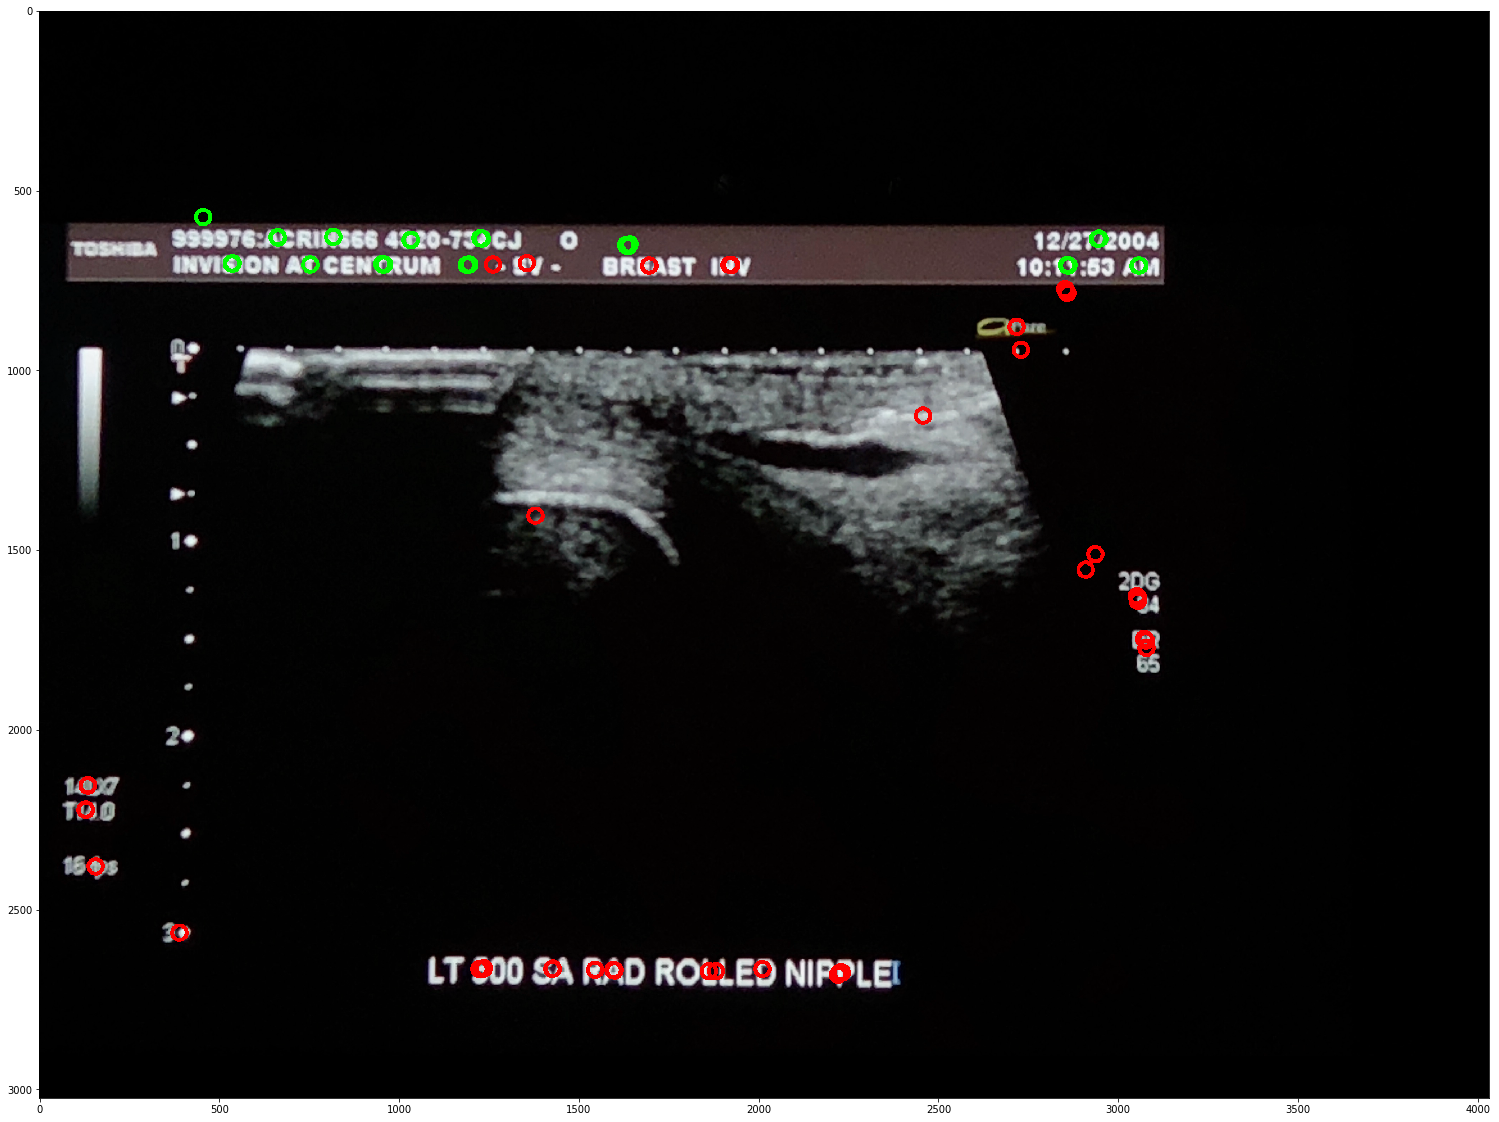

In [37]:
#visualize the results
i=120
img = cv.imread(train_df.loc[i].fileName)
ratio=rand_scale = train_df.loc[i].ratio
sr=train_df.loc[i].sr
sc=train_df.loc[i].sc


old_size = img.shape[:2] # old_size is in (height, width) format

new_size = tuple([int(x*ratio) for x in old_size])

# new_size should be in (width, height) format

im = cv.resize(img, (new_size[1], new_size[0]))

top = int((old_size[0] - new_size[0])/2)
bottom = int((old_size[0] - new_size[0])/2)
left = int((old_size[1] - new_size[1])/2)
right = int((old_size[1] - new_size[1])/2)

if top+bottom+new_size[0] < old_size[0]:
    top += 1
if left+right+new_size[1] < old_size[1]:
    left += 1

color = [0, 0, 0]
img= cv.copyMakeBorder(im, top, bottom, left, right, cv.BORDER_CONSTANT,
    value=color)


rows,cols,_ = img.shape
M = np.float32([[1,0,sc],[0,1,sr]])
img = cv.warpAffine(img,M,(cols,rows))

for dot in train_df.loc[i].piidata:
    cv.circle(img,dot,20,color=(0,255,0),thickness=10)
for dot in train_df.loc[i].nopiidata:
    cv.circle(img,dot,20,color=(255,0,0),thickness=10)
plt.figure(figsize=(30,20))
plt.imshow(img)
plt.show()